In [3]:
# import basic libraries

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#getting dataset
df= pd.read_excel("Rating_&_Reviews_dataset.xlsx")
df.head()

,Unnamed: 0,Reviews,Ratings
0,0,Thank you for delivery it just in one day . I ...,5
1,1,Amazing watch ! Was lill skeptic before buying...,5
2,2,"Superb Quality , Nothing like apple , No need ...",5
3,3,Apple does seem to release stable product over...,5
4,4,Just just amazing and fall in love at firs gla...,5


In [5]:
# chceking the dimension of dataset
df.shape

(31405, 3)

In [6]:
# getting general summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31405 entries, 0 to 31404
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31405 non-null  int64 
 1   Reviews     31404 non-null  object
 2   Ratings     31405 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 736.2+ KB


From above observation we can see that we have  number of columns and 31405 number of rows.
Among these columns we can clearly see that Unnamed: 0 is merely an index or id columns, we can drop it.
The last column we have is Rating, We can see that rating is already a numerical column, whose values ranges from 1-5. In our project we need to prepare a model which will predict the rating, while reading the text reviews. So our Label will be Rating only.
And our feature column will be Reviews.
We also observe that , not all the values are non null, it means we do have missing values/null in the dataset.

In [7]:
# let's drop unwanted columns, we will make another dataframe with just two columns
data= df.drop(columns=['Unnamed: 0'], axis=1)
data

,Reviews,Ratings
0,Thank you for delivery it just in one day . I ...,5
1,Amazing watch ! Was lill skeptic before buying...,5
2,"Superb Quality , Nothing like apple , No need ...",5
3,Apple does seem to release stable product over...,5
4,Just just amazing and fall in love at firs gla...,5
...,...,...
31400,Great Experience,5
31401,Premium product,5
31402,"At one go you will get Bluetooth, FM, Auxiliar...",5
31403,The product was defective,1


In [8]:
# checking for null value
data.isna().sum()

Reviews    1
Ratings    0
dtype: int64

We can see that the null value is present in reviews, which is a categorical column, consist of rays of strings. It would be better if we drop it.

In [9]:
#dropping the row consist of null values
data.dropna(axis=0, inplace= True)

In [10]:
# chceking the dimension of dataset to make sure, the row is dropped
data.shape   

(31404, 2)

In [11]:
# statistical summary of the dataset.
data.describe()

,Ratings
count,31404.000000
mean,4.114826
std,1.377876
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
data.describe(include=object)

,Reviews
count,31404
unique,19448
top,Good
freq,921


From above observation we can see that our dataset label is not balanced, as the mean value of the entire dataset is 4. As we Know in rating system, the values are normally near 3 as mean considered to be balanced. Also we notice that certain comments/reviews also kind of repeating. It may be those kind of reviews where user mostly don't elaborate their view points and tired to write using some common words which explains not much about product.
We can either keep the duplicates and make our entire model or drop them. But dropping them may result in dataloss, while keeping them may result in discrepancy in the accuracy of the model.
We will decide about it later.

In [13]:
# chceking for number of reviews belongs to different classes of labels.
data['Ratings'].value_counts()

5    19153
4     5468
1     3903
3     1922
2      958
Name: Ratings, dtype: int64

From above we can see that, we have good amount of reviews for 5 rating and least numbers for 2 ratings, which means our dataset is little bit imbalanced. Let's move ahead with some visualization. And then we will preprocess the entire dataset.

In [14]:
# Once again chceking for null values
data.isnull().sum()

Reviews    0
Ratings    0
dtype: int64

Now our dataset looks good, I guess we are good to proceed ahead. Let's first visualise how our rating column is distributed, before we starts with data pre processing steps.

<AxesSubplot:xlabel='Ratings', ylabel='count'>

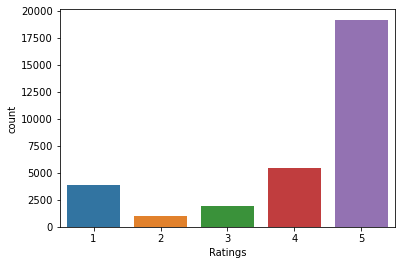

In [15]:
# visualization of the target column
sns.countplot(data['Ratings'])

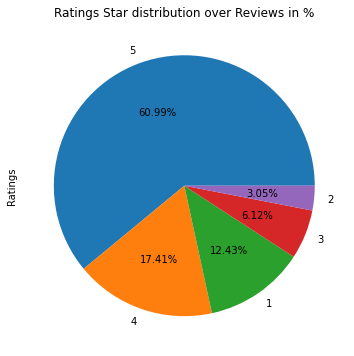

In [18]:
# pie chart representation
plt.figure(figsize=(10,6))
(data['Ratings'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.2f%%')
plt.title("Ratings Star distribution over Reviews in %")
plt.show()

We can observe that our data set is not balanced, let's starts with some data cleaning, then we will visualize some meaningful data using word cloud. This is an NLP problem. As we need to analyse the text data to predict the output. Also we have 5 rating, which are in integer form which ultimately fulfill our main objective.



# Data Cleaning

In [19]:
# checking for duplicates
data.duplicated().value_counts()

False    19822
True     11582
dtype: int64

In [20]:
#dropping the duplicates and storing the values in different dataframe.
df1= data.drop_duplicates()

In [21]:
# chceking the unique value counts in rating column
df1['Ratings'].value_counts()

5    11415
4     3459
1     2870
3     1323
2      755
Name: Ratings, dtype: int64

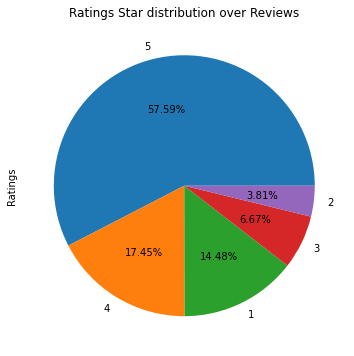

In [22]:
plt.figure(figsize=(10,6))
(df1['Ratings'].value_counts()*100.0 /len(df1)).plot.pie(autopct='%.2f%%')
plt.title("Ratings Star distribution over Reviews")
plt.show()

We can see that most of the data consist of 5 star rating, while 2 star rating data are very less in number, there is sure short imbalance among the classes of labels. So we need to take care of it while building the model.

We can also see that in comparison with full dataset, reviews for 5 starts decreases, and all others stars increases which means the imbalance in the dataset tries to decrease by few points, in my opinion it will better if we proceed with this dataset.
We still got enough data to work on, around 20k reviews can serve as good amount of reviews to predict the ratings.


# Data preprocessing

In [23]:
from IPython.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

In [24]:
import re

In [25]:

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer

import string

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words=stopwords.words('english')
lemmatizer= WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
#checking length of document
df1["original_len"] = df1["Reviews"].str.len() 

In [28]:
#convert text to lowercase
df1['Reviews']=df1['Reviews'].str.lower()

In [29]:
sentence=['Reviews']
for sen in sentence:
    # Replace email addresses with 'email'
    df1[sen] = df1[sen].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    df1[sen] = df1[sen].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    df1[sen] = df1[sen].str.replace(r'£|\$', 'dollars')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df1[sen] = df1[sen].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')
    

    # Replace numbers with 'numbr'
    df1[sen] = df1[sen].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    df1[sen] = df1[sen].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    df1[sen] = df1[sen].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    df1[sen] = df1[sen].str.replace(r'^\s+|\s+?$', '')
df1.head()

,Reviews,Ratings,original_len
0,thank you for delivery it just in one day i lo...,5,142
1,amazing watch was lill skeptic before buying b...,5,200
2,superb quality nothing like apple no need to g...,5,382
3,apple does seem to release stable product over...,5,500
4,just just amazing and fall in love at firs gla...,5,259


In [30]:
# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
df1["Reviews"]= df1["Reviews"].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words ))

In [31]:
# Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.

df1["Reviews"] = df1["Reviews"].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

In [32]:
#checking clean length
df1["clean_len"] = df1["Reviews"].str.len() 

In [33]:
df1.head()

,Reviews,Ratings,original_len,clean_len
0,thank delivery one day loved watch sharing pic...,5,142,79
1,amazing watch lill skeptic buying percent genu...,5,200,127
2,superb quality nothing like apple need go iwat...,5,382,284
3,apple seem release stable product time ever sh...,5,500,340
4,amazing fall love fir glance truly love first ...,5,259,166


We can observe that the lenght of the text decreases to great extent. Now our data only consist of important words, and all the jargens, punctuations, stopwords are all out of the picture. 

In [34]:
print('original Review length', df1.original_len.sum())
print('clean Review length', df1.clean_len.sum())

original Review length 2563331
clean Review length 1788889


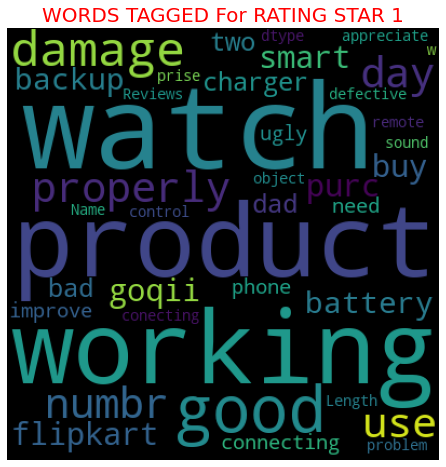

In [35]:
# let's see which all words defines the rating stars
df_star=df1[(df1['Ratings']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_star['Reviews']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED For RATING STAR 1',fontdict={'fontsize':20, 'fontweight':20, 'color':'red'})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

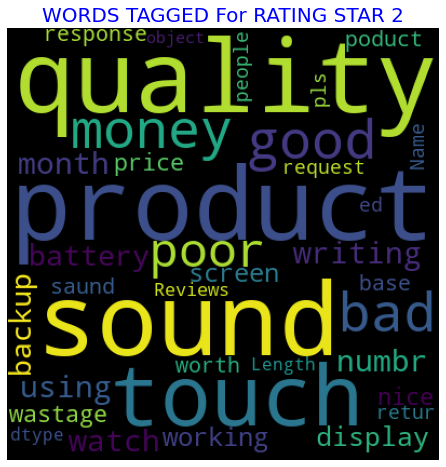

In [36]:
df_star1=df1[(df1['Ratings']==2)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_star1['Reviews']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED For RATING STAR 2',fontdict={'fontsize':20, 'fontweight':20, 'color':'blue'})
plt.show

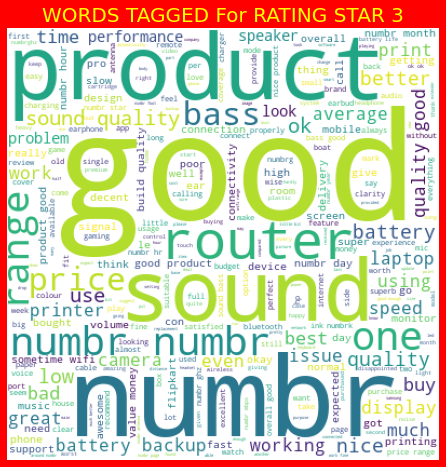

In [37]:
#Getting sense of words in Rating 3
one = df1['Reviews'][df1['Ratings']==3]

one_cloud = WordCloud(width=400,height=400,background_color='white',max_words=300).generate(' '.join(one))

plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED For RATING STAR 3',fontdict={'fontsize':20, 'fontweight':20, 'color':'yellow'})
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

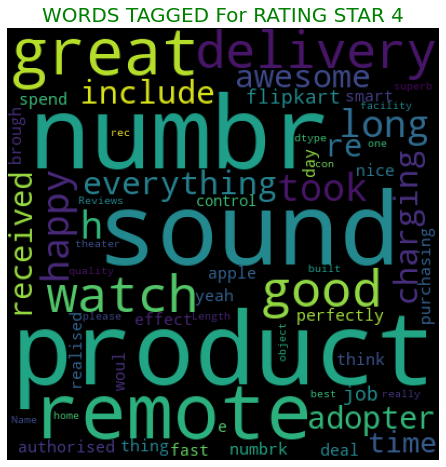

In [38]:
df_star4=df1[(df1['Ratings']==4)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_star4['Reviews']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED For RATING STAR 4',fontdict={'fontsize':20, 'fontweight':20, 'color':'green'})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

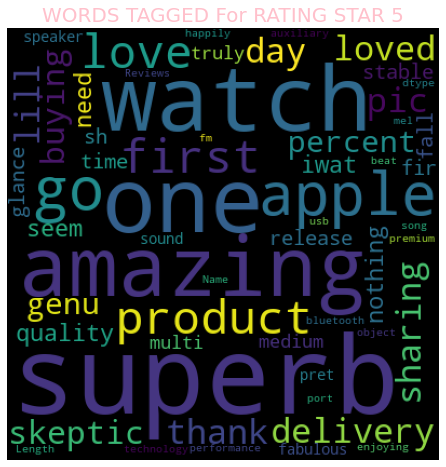

In [39]:
df_star5=df1[(df1['Ratings']==5)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_star5['Reviews']))
plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED For RATING STAR 5',fontdict={'fontsize':20, 'fontweight':20, 'color':'pink'})
plt.show

From above plots We can see that these words are most occurred word in the reviews from rating 1-5. These words defines the rating as per NLP.
Let's do vectorization in order to prepare text data for the NLP model building


# Vectorization

In [40]:
# 1. Convert text into vectors using TF-IDF
# 2. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df1['Reviews'])

x = features
y = df1['Ratings']

Now we will use this data in order to build a model

# Model building

Importing necessary libraries

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [42]:
#handling imbalanced data through smote technique
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {1: 19822, 2: 19822, 3: 19822, 4: 19822, 5: 19822})
x1,y1=os.fit_resample(x,y)
print("The number of classes before fit{}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y1)))

The number of classes before fitCounter({5: 11415, 4: 3459, 1: 2870, 3: 1323, 2: 755})
The number of classes after fit Counter({5: 19772, 1: 19739, 4: 19724, 2: 19710, 3: 19697})


In [43]:
# splitting data into test and train sets
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.30,random_state=150)

# Logistic Regression

In [44]:
#Model 
lr= LogisticRegression()
#fit
lr.fit(x_train,y_train)

#predict
y_pred= lr.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           1       0.79      0.79      0.79      5882
           2       0.75      0.78      0.77      5903
           3       0.72      0.68      0.70      5845
           4       0.59      0.62      0.61      5944
           5       0.64      0.62      0.63      6019

    accuracy                           0.70     29593
   macro avg       0.70      0.70      0.70     29593
weighted avg       0.70      0.70      0.70     29593



In [45]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(lr,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("\naccuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)
conf_mat=confusion_matrix(y_test,y_pred)

print('\n\n Confusion Matrix\n')
print(conf_mat)




accuracy_score :  0.6979015307674112 
 cross validation score : 0.6825897862830729 
F1 Score : 0.6980249393832327


 Confusion Matrix

[[4639  697  229  187  130]
 [ 725 4632  274  193   79]
 [ 312  400 3961  681  491]
 [ 109  149  604 3698 1384]
 [  91  308  427 1470 3723]]


In [46]:
# Let's store all the results in list form.
accuracy = []
cross_val = []
diff=[]
f1=[]
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
f1.append(f)

# MultinomialNB

In [47]:
#Model
mb= MultinomialNB()

#fit
mb.fit(x_train,y_train)

#Predict
y_pred=mb.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
a=accuracy_score(y_test,y_pred)
c=cross_val_score(mb,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           1       0.75      0.78      0.76      5882
           2       0.76      0.68      0.72      5903
           3       0.67      0.66      0.67      5845
           4       0.57      0.65      0.61      5944
           5       0.66      0.60      0.63      6019

    accuracy                           0.68     29593
   macro avg       0.68      0.68      0.68     29593
weighted avg       0.68      0.68      0.68     29593


-----------------------------------------------------------

accuracy_score :  0.675869293413983 
 cross validation score : 0.6603984685318458 
F1 Score : 0.6752364206048993


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[4590  663  290  209  130]
 [ 999 4032  526  272   74]
 [ 364  333 3885  790  473]
 [ 105  139  606 3882 1212]
 [ 102  140  479 1686 3612]]


In [48]:
# adding values in the list formed
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# Decision Tree Classifier

In [49]:
#Model
dt= DecisionTreeClassifier()
#fit
dt.fit(x_train,y_train)

#predict
y_pred=dt.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
a=accuracy_score(y_test,y_pred)
c=cross_val_score(dt,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           1       0.90      0.87      0.89      5882
           2       0.88      0.92      0.90      5903
           3       0.82      0.85      0.84      5845
           4       0.72      0.72      0.72      5944
           5       0.72      0.68      0.70      6019

    accuracy                           0.81     29593
   macro avg       0.81      0.81      0.81     29593
weighted avg       0.81      0.81      0.81     29593


-----------------------------------------------------------

accuracy_score :  0.8089413036866827 
 cross validation score : 0.7965268323140146 
F1 Score : 0.8096506243207405


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[5126  338  180  107  131]
 [ 178 5411  139   76   99]
 [ 138  125 4983  269  330]
 [ 122   84  365 4309 1064]
 [ 123  179  407 1200 4110]]


In [50]:
# adding values in the list formed
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# Ensemble technique (RandomForest)

In [51]:
# Model
rf= RandomForestClassifier()

#fit
rf.fit(x_train,y_train)

#predict
y_pred=rf.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
a=accuracy_score(y_test,y_pred)
c=cross_val_score(rf,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           1       0.96      0.94      0.95      5882
           2       0.95      0.97      0.96      5903
           3       0.94      0.94      0.94      5845
           4       0.89      0.89      0.89      5944
           5       0.87      0.87      0.87      6019

    accuracy                           0.92     29593
   macro avg       0.92      0.92      0.92     29593
weighted avg       0.92      0.92      0.92     29593


-----------------------------------------------------------

accuracy_score :  0.9226168350623458 
 cross validation score : 0.9156242627294232 
F1 Score : 0.9226382205422409


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[5545  158   58   43   78]
 [  75 5697   70   18   43]
 [  50   56 5518   70  151]
 [  31   19  106 5290  498]
 [  75   61  130  500 5253]]


In [52]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# ADA Boost Classifier

In [53]:
# Model
ada=AdaBoostClassifier(n_estimators=100)

#fit
ada.fit(x_train,y_train)

# Predict
y_pred=ada.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
a=accuracy_score(y_test,y_pred)
c=cross_val_score(ada,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           1       0.57      0.66      0.61      5882
           2       0.44      0.41      0.43      5903
           3       0.42      0.40      0.41      5845
           4       0.46      0.42      0.44      5944
           5       0.52      0.53      0.53      6019

    accuracy                           0.48     29593
   macro avg       0.48      0.48      0.48     29593
weighted avg       0.48      0.48      0.48     29593


-----------------------------------------------------------

accuracy_score :  0.48470922177541986 
 cross validation score : 0.47551756132420103 
F1 Score : 0.4877851335889523


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[3872 1374  447   95   94]
 [2142 2446  935  203  177]
 [ 551 1014 2339 1108  833]
 [  97  330 1235 2485 1797]
 [ 181  437  676 1523 3202]]


In [54]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# XGBOOST Classifier

In [2]:
!pip install xgboost==0.90

In [55]:
# Model
xg= XGBClassifier()

#fit
xg.fit(x_train,y_train)

# Predict
y_pred=xg.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
a=accuracy_score(y_test,y_pred)
c=cross_val_score(xg,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           1       0.63      0.67      0.65      5882
           2       0.47      0.52      0.50      5903
           3       0.58      0.42      0.49      5845
           4       0.45      0.53      0.49      5944
           5       0.55      0.53      0.54      6019

    accuracy                           0.53     29593
   macro avg       0.54      0.53      0.53     29593
weighted avg       0.54      0.53      0.53     29593


-----------------------------------------------------------

accuracy_score :  0.5327273341668638 
 cross validation score : 0.5258916211974598 
F1 Score : 0.5332852972867252


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[3914 1323  291  266   88]
 [1769 3061  535  431  107]
 [ 309  912 2466 1389  769]
 [  70  469  641 3137 1627]
 [ 109  699  288 1736 3187]]


In [56]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# Bagging Classifier

In [57]:
# MOdel
bg= BaggingClassifier()

#Fit
bg.fit(x_train,y_train)

#predict
y_pred=bg.predict(x_test)

print("\nClassification report :\n",classification_report(y_test,y_pred))
print("\n-----------------------------------------------------------\n")
a=accuracy_score(y_test,y_pred)
c=cross_val_score(bg,x1,y1,cv=3).mean()
f=f1_score(y_pred,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)

print("\n\n--------------------------------------------------------------\n\n")
conf_mat=confusion_matrix(y_test,y_pred)
print("\n CONFUSION MATRIX \n",conf_mat)


Classification report :
               precision    recall  f1-score   support

           1       0.92      0.90      0.91      5882
           2       0.91      0.94      0.92      5903
           3       0.84      0.90      0.87      5845
           4       0.76      0.78      0.77      5944
           5       0.78      0.70      0.74      6019

    accuracy                           0.84     29593
   macro avg       0.84      0.84      0.84     29593
weighted avg       0.84      0.84      0.84     29593


-----------------------------------------------------------

accuracy_score :  0.8426317034433819 
 cross validation score : 0.8308023075691883 
F1 Score : 0.8438175475081242


--------------------------------------------------------------



 CONFUSION MATRIX 
 [[5300  244  151   80  107]
 [ 145 5537  114   55   52]
 [ 100  115 5235  192  203]
 [  80   82  338 4652  792]
 [ 122  127  412 1146 4212]]


In [58]:
accuracy.append(a)
cross_val.append(c)
f1.append(f)
diff.append(a-c)

# Summarizing Each Model.

In [59]:
model= ["Logistic Regression","MultinomialNB", "Decision Tree Classifier", "RandomForest Classifier","AdaBoost Classifier", "XGBoost Classifier","Bagging Classifier" ]

In [60]:
Classification_Algo = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"F1 Score":f1,"difference":diff})

Classification_Algo

,MODEL,Accuracy score,Cross_validation_Score,F1 Score,difference
0,Logistic Regression,0.697902,0.682590,0.698025,0.015312
1,MultinomialNB,0.675869,0.660398,0.675236,0.015471
2,Decision Tree Classifier,0.808941,0.796527,0.809651,0.012414
3,RandomForest Classifier,0.922617,0.915624,0.922638,0.006993
4,AdaBoost Classifier,0.484709,0.475518,0.487785,0.009192
5,XGBoost Classifier,0.532727,0.525892,0.533285,0.006836
6,Bagging Classifier,0.842632,0.830802,0.843818,0.011829


From above we can clearly observe that RandomForest Classifier is the best fitted model for our dataset, It has high value for both f1 score and cross validation score. Also the difference between accuracy and cross validation is very less.

let's plot the auc roc score before saving the model.

In [61]:
#logistic regression
print("LogisticRegression roc_auc_score :",roc_auc_score(y_test,lr.predict_proba(x_test),multi_class='ovr'))


#BaggingClassifier
print("BaggingClassifier roc_auc_score :",roc_auc_score(y_test,bg.predict_proba(x_test),multi_class='ovr'))

#DecisionTree
print("DecisionTree roc_auc_score :",roc_auc_score(y_test,dt.predict_proba(x_test),multi_class='ovr'))

#RandomForestClassifier
print("RandomForestClassifier roc_auc_score :",roc_auc_score(y_test,rf.predict_proba(x_test),multi_class='ovr'))

#MultinomialNB
print("MultinomialNB roc_auc_score :",roc_auc_score(y_test,mb.predict_proba(x_test),multi_class='ovr'))

#XGBClassifier
print("XGBClassifier roc_auc_score :",roc_auc_score(y_test,xg.predict_proba(x_test),multi_class='ovr'))

#AdaBoost Classifier
print("AdaBoostClassifier roc_auc_score : ", roc_auc_score(y_test,ada.predict_proba(x_test),multi_class='ovr'))

LogisticRegression roc_auc_score : 0.9195613150460706
BaggingClassifier roc_auc_score : 0.9657847701228943
DecisionTree roc_auc_score : 0.8964653625853289
RandomForestClassifier roc_auc_score : 0.9885227559556997
MultinomialNB roc_auc_score : 0.9079833266012581
XGBClassifier roc_auc_score : 0.8446360263846089
AdaBoostClassifier roc_auc_score :  0.7648884730541745


Even the roc_auc_score of RandonForest Classifier is highest among all other models. This simply proves that RandondomForest is the best fitted model for our dataset. Now let's do some hyper parameter tuning for it, so that we can increase its efficiency further.

# Hyper Parameter Tuning

In [ ]:
# We will perform hyper parameter tuning using Randomized Search Cv.
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

parameters={'n_estimators': [100, 200, 300],
           'criterion':["gini","entropy"],
           'bootstrap':[True,False],}

rf=RandomForestClassifier()

grid_search=RandomizedSearchCV(rf,parameters,cv=3)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

In [65]:
rf=RandomForestClassifier(n_estimators=200,criterion="entropy",bootstrap=False)
rf.fit(x_train,y_train)
y_pred1=rf.predict(x_test)

In [66]:
print("\nClassification report :\n",classification_report(y_test,y_pred1))

a=accuracy_score(y_test,y_pred1)
c=cross_val_score(rf,x1,y1,cv=3).mean()
f=f1_score(y_pred1,y_test,average="weighted")
print("accuracy_score : ",a,"\n","cross validation score :",c,"\nF1 Score :",f)


Classification report :
               precision    recall  f1-score   support

           1       0.96      0.95      0.95      5882
           2       0.95      0.97      0.96      5903
           3       0.95      0.94      0.94      5845
           4       0.91      0.90      0.91      5944
           5       0.88      0.90      0.89      6019

    accuracy                           0.93     29593
   macro avg       0.93      0.93      0.93     29593
weighted avg       0.93      0.93      0.93     29593

accuracy_score :  0.9308282364072584 
 cross validation score : 0.9272014965712456 
F1 Score : 0.9308367122022992


<AxesSubplot:xlabel='Ratings'>

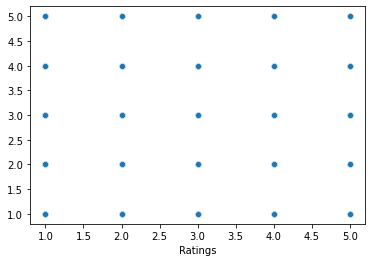

In [67]:
sns.scatterplot(y_test,y_pred1)

<AxesSubplot:xlabel='Ratings', ylabel='Density'>

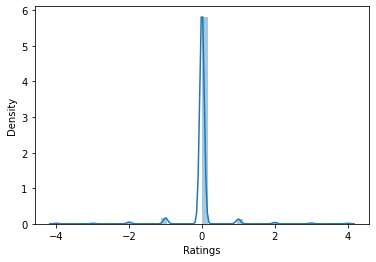

In [68]:
sns.distplot(y_test-y_pred1)

From above plots it is clear that, RandomForest Classifier algorithm is the best fitted Algorithm for this data set, the predicted value and true values very well align. Performing hyper parameter tuning definitely helps in improving the efficiency of the model.

Now let's move ahead and save our final model.

# Saving Final Model.

In [70]:
import pickle
pickle.dump(rf,open("Reviews_Rating_prediction.pk1","wb"))

In [ ]:
_